# DEMO 4.1: **Đánh giá mô hình PHÂN LỚP**
<u>Nội dung</u>:
1. Đánh giá phương pháp k-NN
2. Xác định k trong phương pháp k-NN
3. Cross-validation
4. Grid search
5. Random search

<u>Cập nhật</u>: **09/2025**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch4 - Danh gia giai phap'

Mounted at /content/gdrive


In [ ]:
pip install comet_ml

In [ ]:
## Thư viện
import joblib                 as jlb
import matplotlib.pyplot      as plt
import numpy                  as np
import pandas                 as pd
import seaborn                as sbn

from comet_ml                 import ConfusionMatrix
from sklearn                  import metrics
from sklearn.metrics          import accuracy_score, confusion_matrix
from sklearn.metrics          import auc,roc_curve
from sklearn.metrics          import precision_score, recall_score, f1_score
from sklearn.model_selection  import train_test_split
from sklearn.neighbors        import KNeighborsClassifier

---
## 1. **Đánh giá phương pháp k-NN**
---

In [ ]:
## Tập tin dữ liệu
data = pd.read_csv(folder + '/Data/Social_Network_Ads.csv')

In [ ]:
## Các features: Gender, Age, EstimatedSalary
X = data.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis = 1)

## Biến target: Purchased
y = data.Purchased

print(pd.concat([X, y], axis = 1).head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [ ]:
## Chuyển Gender thành kiểu Numerical
sex = {'Male':1, 'Female':0}
X['Male'] = [sex[i] for i in data.Gender]
X  = X.drop(['Gender'], axis = 1)

print(pd.concat([X, y], axis = 1).head())

   Age  EstimatedSalary  Male  Purchased
0   19            19000     1          0
1   35            20000     1          0
2   26            43000     0          0
3   27            57000     0          0
4   19            76000     1          0


In [ ]:
## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
##------------------------------------------------------------------------------
## Xây dựng mô hình kNN Classification
##------------------------------------------------------------------------------
k   = int(pow(X_train.shape[0], 1/2) / 2)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)  # huấn luyện để tạo  mô hình

KNeighborsClassifier(n_neighbors=8)

In [ ]:
## Kiểm thử mô hình
y_pred = knn.predict(X_test)

In [ ]:
## Hàm đánh giá (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
def classification_eval(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
## Đánh giá mô hình bằng các chỉ số
scores = classification_eval(y_test, y_pred)

## ROC và AUC: phân lớp NHỊ PHÂN
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr) ## nếu gọi trực tiếp auc(fpr, tpr) sẽ bị báo lỗi:  'numpy.float64' object is not callable

## Hiển thị giá trị các chỉ số
print(f'accuray   = {(scores[0] * 100):.1f}%')
print(f'precision = {(scores[1] * 100):.1f}%')
print(f'recall    = {(scores[2] * 100):.1f}%')
print(f'f1        = {(scores[3] * 100):.1f}%')
print(f'AUC       = {(auc * 100):.1f}%')

accuray   = 71.2%
precision = 68.0%
recall    = 53.1%
f1        = 59.6%
AUC       = 68.2%


In [ ]:
## Ma trận nhầm lẫn
print("* Purchased = 0 -->", y_test[y_test == 0].size, 'trường hợp')
print("* Purchased = 1 -->", y_test[y_test == 1].size, 'trường hợp')
print(confusion_matrix(y_test, y_pred))

* Purchased = 0 --> 48 trường hợp
* Purchased = 1 --> 32 trường hợp
[[40  8]
 [15 17]]


---
## 2. **Xác định k trong phương pháp k-NN**
---

In [ ]:
## Phân tích giá trị của k theo chỉ số accuracy
list_k   = []
list_acc = []

for k in range(2, int(pow(X_train.shape[0], 1/2) / 2) + 2):
    list_k.append(k)

    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train, y_train)

    y_pred   = neigh.predict(X_test)
    acc      = accuracy_score(y_test, y_pred)
    list_acc.append(acc)
    print(f'k = {k:d} --> accuracy ~ {acc * 100:.1f}%')

k = 2 --> accuracy ~ 72.5%
k = 3 --> accuracy ~ 76.2%
k = 4 --> accuracy ~ 77.5%
k = 5 --> accuracy ~ 75.0%
k = 6 --> accuracy ~ 73.8%
k = 7 --> accuracy ~ 72.5%
k = 8 --> accuracy ~ 71.2%
k = 9 --> accuracy ~ 73.8%


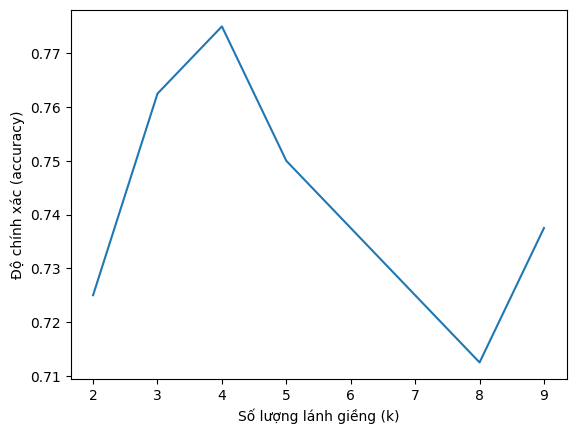

In [ ]:
## Biểu diễn trực quan dữ liệu phân tích giá trị k
plt.plot(list_k, list_acc)
plt.xlabel('Số lượng lánh giềng (k)')
plt.ylabel('Độ chính xác (accuracy)')
plt.show()

In [ ]:
## Xây dựng mô hình với giá trị tối ưu của k
k = list_k[np.argmax(list_acc)]
print(f'Giá trị k = {k:d} tạo mô hình k-NN có độ chính xác cao nhất.')

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)  # huấn luyện để tạo mô hình

Giá trị k = 4 tạo mô hình k-NN có độ chính xác cao nhất.


KNeighborsClassifier(n_neighbors=4)

In [ ]:
## Khai thác thử nghiệm mô hình
tiep   = 'C'
labels = np.array(['KHÔNG mua', 'MUA'])
while (tiep.upper() == 'C'):
    idx    = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {X_test.shape[0]}: ')))
    idx    = idx % X_test.shape[0]
    X_new  = X_test[idx:idx + 1]
    y_pred = knn.predict(X_new)
    print('Mẫu', X_new.to_string(), '      được dự đoán là', labels[y_pred])
    tiep = input('Tiếp tục (C/K) ? ')

Nhập chỉ số dòng từ 0 đến 80: 78
Mẫu      Age  EstimatedSalary  Male
132   30            87000     1       được dự đoán là ['KHÔNG mua']
Tiếp tục (C/K) ? 


---
## 3. **k-fold Cross Validation**
---

In [ ]:
## Tập tin dữ liệu IRIS
data = pd.read_excel(folder + '/Data/Iris.xls')
print(data.head())

In [ ]:
## Các features: sepallength, sepalwidth, petallength, petalwidth
X = data.drop('iris', axis = 1)
X.head()

## Biến target: iris
y = data.iris

print(pd.concat([X, y], axis = 1).head())

In [ ]:
## Áp dụng train/test split cho dữ liệu X, y theo tỷ lệ 70:30.
##    In các index của mỗi bộ.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.index)
print(X_test.index)

In [ ]:
## 4. Áp dụng K-fold
cv = KFold(n_splits = 10, shuffle = True)

## In các index của mỗi bộ.
k = 1
for train_index, test_index in cv.split(X):
    print(f"** k = {k}")
    print("  - Train Index:", train_index.tolist())
    print("  - Test Index: ", test_index.tolist(), "\n")
    X_train, X_test = X.iloc[train_index.tolist()], X.iloc[test_index.tolist()]
    y_train, y_test = y.iloc[train_index.tolist()], y.iloc[test_index.tolist()]

    k += 1